<a href="https://colab.research.google.com/github/hongqin/Python-CoLab-bootcamp/blob/master/Learn_Python_by_analying_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Python to analyze the Covid19 data
Hong Qin

Video at https://youtu.be/1JDP4o92tss 

These materials are for education only.


In [1]:
### Import libraries
import pandas as pd # primary data structure library

# Part1. Get JHU COVID19 Data into Python

This data is collected from repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE).https://github.com/CSSEGISandData/COVID-19

In [185]:

### Select data path
#fullpath1= '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'

fullpath1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
df1 = pd.read_csv(fullpath1, error_bad_lines=False)

#fullpath2 = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
fullpath2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

df2 = pd.read_csv(fullpath2, error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


## DataFrame is Python Pandas word for Excel spreadsheet

# Part 2. Explore USA time series by counties

In [113]:
df1.shape

(3342, 899)

view the dataframe

In [114]:
df1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,16211,16211,16279,16313,16330,16360,16400,16400,16400,16468
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,57726,57726,57887,58009,58169,58293,58372,58372,58372,58595
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,5782,5782,5795,5813,5818,5825,5832,5832,5832,5857
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,6611,6611,6621,6630,6648,6654,6663,6663,6663,6679
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,15207,15207,15222,15246,15249,15272,15283,15283,15283,15324


How to find out the columns?

In [108]:
#dir(df1)

In [115]:
df1.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '6/18/22', '6/19/22', '6/20/22', '6/21/22', '6/22/22', '6/23/22',
       '6/24/22', '6/25/22', '6/26/22', '6/27/22'],
      dtype='object', length=899)

In [116]:
df1.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,10554,10554,10554,10699,10699,10699,10699,10699,10699,10699
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,5753,5753,5753,5784,5784,5784,5784,5784,5784,5784
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,2471,2471,2471,2490,2490,2490,2490,2490,2490,2490
3341,84056045,US,USA,840,56045.0,Weston,Wyoming,US,43.839612,-104.567488,...,1632,1632,1632,1641,1641,1641,1641,1641,1641,1641


In [8]:
df1

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,16211,16211,16279,16313,16330,16360,16400,16400,16400,16468
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,57726,57726,57887,58009,58169,58293,58372,58372,58372,58595
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,5782,5782,5795,5813,5818,5825,5832,5832,5832,5857
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,6611,6611,6621,6630,6648,6654,6663,6663,6663,6679
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,15207,15207,15222,15246,15249,15272,15283,15283,15283,15324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,10554,10554,10554,10699,10699,10699,10699,10699,10699,10699
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,5753,5753,5753,5784,5784,5784,5784,5784,5784,5784
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,2471,2471,2471,2490,2490,2490,2490,2490,2490,2490


In [117]:
df1['Lat'][3337:3339]

3337    43.935225
3338    41.287818
Name: Lat, dtype: float64

In [120]:
df1.iloc[3337:3340, 8:11] #be aware that Python is typically end-exclusive! 

,Lat,Long_,Combined_Key
3337,43.935225,-110.589080,"Teton, Wyoming, US"
3338,41.287818,-110.547578,"Uinta, Wyoming, US"
3339,0.000000,0.000000,"Unassigned, Wyoming, US"


How to find out dataframe dimensions

In [121]:
print ('dataframe dimensions:', df1.shape)

dataframe dimensions: (3342, 899)


How many "province states" are there in this data set?

In [122]:
df1.Province_State.unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [123]:
len(df1.Province_State.unique())

58

### Q, what is the larged case value in this data set? 

In [14]:
df1.iloc[:, 11:].max().max()

3102110

In [15]:
df1.idxmax

<bound method DataFrame.idxmax of            UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0     84001001   US  USA    840   1001.0     Autauga        Alabama   
1     84001003   US  USA    840   1003.0     Baldwin        Alabama   
2     84001005   US  USA    840   1005.0     Barbour        Alabama   
3     84001007   US  USA    840   1007.0        Bibb        Alabama   
4     84001009   US  USA    840   1009.0      Blount        Alabama   
...        ...  ...  ...    ...      ...         ...            ...   
3337  84056039   US  USA    840  56039.0       Teton        Wyoming   
3338  84056041   US  USA    840  56041.0       Uinta        Wyoming   
3339  84090056   US  USA    840  90056.0  Unassigned        Wyoming   
3340  84056043   US  USA    840  56043.0    Washakie        Wyoming   
3341  84056045   US  USA    840  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_  ... 6/18/22  6/19/22  6/20/22  \
0                US  32.539527  -86.

Find out the largest value for column '10/20/21'

In [16]:
df1["6/26/22"].max()

3088482

## Find out which row has the largest value. 

In [124]:
df1.loc[df1['6/27/22']>=3088482]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22
215,84006037,US,USA,840,6037.0,Los Angeles,California,US,34.308284,-118.228241,...,3057004,3057004,3069037,3071314,3076849,3082401,3088482,3088482,3088482,3102110


## plot
Because pandas do plot by columns, JHU data set put time series by row. So, we have to transpose the JHU dataframe. 

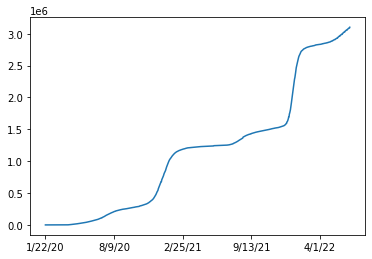

In [125]:
LA = df1.iloc[215, 11:]
type(LA)
#print(LA)
LA.plot()

In [19]:
df1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,16211,16211,16279,16313,16330,16360,16400,16400,16400,16468
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,57726,57726,57887,58009,58169,58293,58372,58372,58372,58595
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,5782,5782,5795,5813,5818,5825,5832,5832,5832,5857
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,6611,6611,6621,6630,6648,6654,6663,6663,6663,6679
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,15207,15207,15222,15246,15249,15272,15283,15283,15283,15324


In [20]:
df1.iloc[:, 11:].head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22
0,0,0,0,0,0,0,0,0,0,0,...,16211,16211,16279,16313,16330,16360,16400,16400,16400,16468
1,0,0,0,0,0,0,0,0,0,0,...,57726,57726,57887,58009,58169,58293,58372,58372,58372,58595
2,0,0,0,0,0,0,0,0,0,0,...,5782,5782,5795,5813,5818,5825,5832,5832,5832,5857
3,0,0,0,0,0,0,0,0,0,0,...,6611,6611,6621,6630,6648,6654,6663,6663,6663,6679
4,0,0,0,0,0,0,0,0,0,0,...,15207,15207,15222,15246,15249,15272,15283,15283,15283,15324


In [21]:
UScases = df1.iloc[0:3, 11:].transpose() 
UScases.shape
UScases

,0,1,2
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0
...,...,...,...
6/23/22,16360,58293,5825
6/24/22,16400,58372,5832
6/25/22,16400,58372,5832
6/26/22,16400,58372,5832


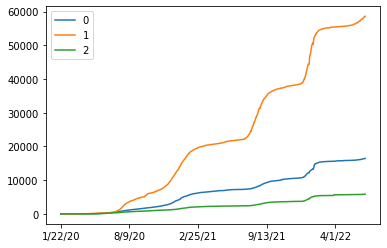

In [22]:
UScases.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ce36718d0>,
      dtype=object)

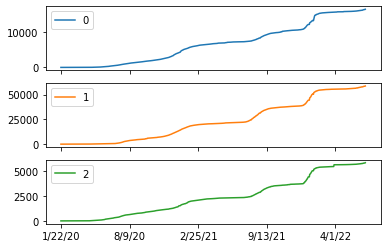

In [23]:
UScases.plot(subplots=True)

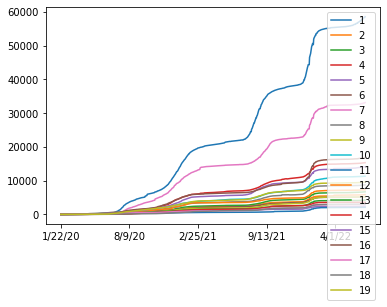

In [24]:
df1.iloc[1:20, 11:].transpose().plot()

## Add meaningful index to the dataframe

In [126]:
# one way is to load csv with index 
df1 = pd.read_csv(fullpath1, error_bad_lines=False, index_col=10) #10th index picks 11th column of "Combined_Key"
df1.reset_index(drop=True)
df1.index

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['Autauga, Alabama, US', 'Baldwin, Alabama, US', 'Barbour, Alabama, US',
       'Bibb, Alabama, US', 'Blount, Alabama, US', 'Bullock, Alabama, US',
       'Butler, Alabama, US', 'Calhoun, Alabama, US', 'Chambers, Alabama, US',
       'Cherokee, Alabama, US',
       ...
       'Park, Wyoming, US', 'Platte, Wyoming, US', 'Sheridan, Wyoming, US',
       'Sublette, Wyoming, US', 'Sweetwater, Wyoming, US',
       'Teton, Wyoming, US', 'Uinta, Wyoming, US', 'Unassigned, Wyoming, US',
       'Washakie, Wyoming, US', 'Weston, Wyoming, US'],
      dtype='object', name='Combined_Key', length=3342)

In [127]:
# another way is to re-assign index
df1 = pd.read_csv(fullpath1, error_bad_lines=False)
newrows = list( df1['Combined_Key'])
df1.index =  newrows
df1.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


(3342, 899)

In [128]:
df1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22
"Autauga, Alabama, US",84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,16211,16211,16279,16313,16330,16360,16400,16400,16400,16468
"Baldwin, Alabama, US",84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,57726,57726,57887,58009,58169,58293,58372,58372,58372,58595
"Barbour, Alabama, US",84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,5782,5782,5795,5813,5818,5825,5832,5832,5832,5857
"Bibb, Alabama, US",84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,6611,6611,6621,6630,6648,6654,6663,6663,6663,6679
"Blount, Alabama, US",84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,15207,15207,15222,15246,15249,15272,15283,15283,15283,15324


In [28]:
list(df1['Combined_Key'] )[1:10]

['Baldwin, Alabama, US',
 'Barbour, Alabama, US',
 'Bibb, Alabama, US',
 'Blount, Alabama, US',
 'Bullock, Alabama, US',
 'Butler, Alabama, US',
 'Calhoun, Alabama, US',
 'Chambers, Alabama, US',
 'Cherokee, Alabama, US']

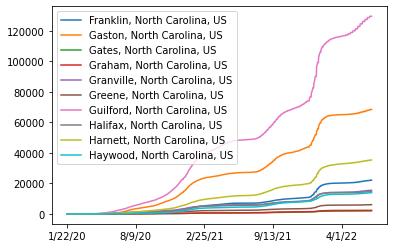

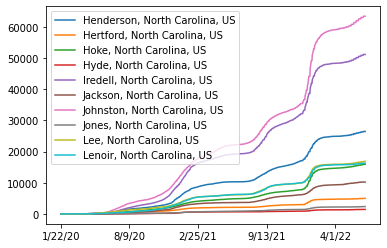

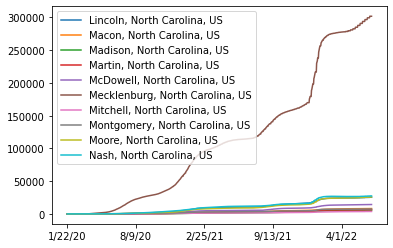

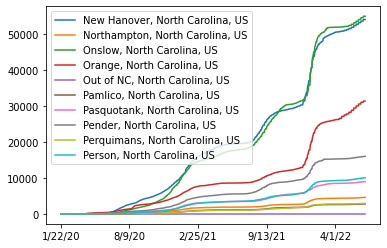

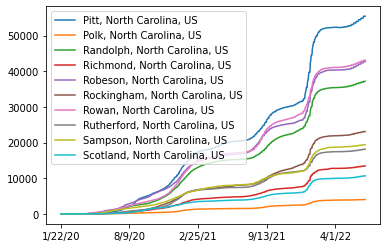

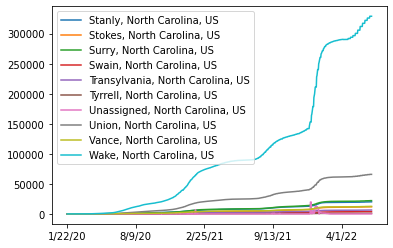

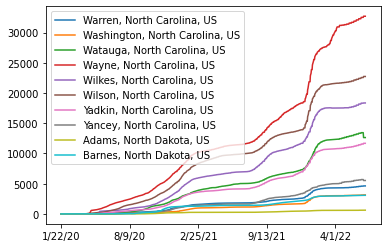

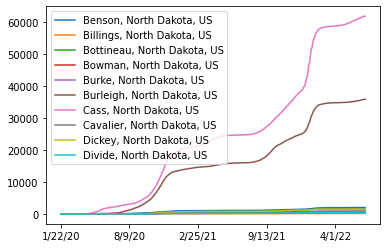

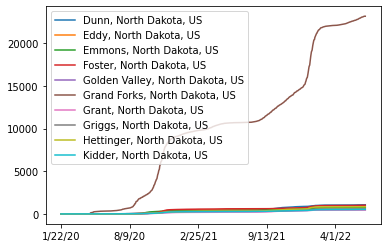

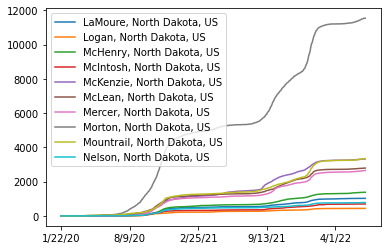

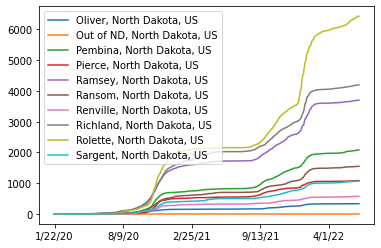

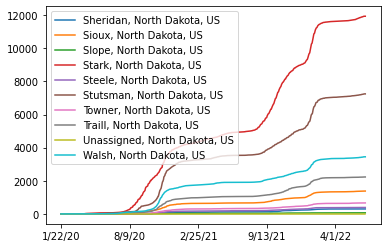

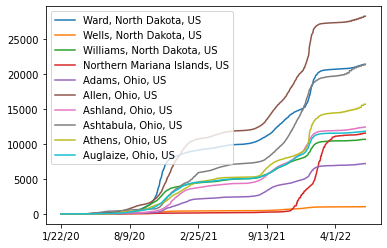

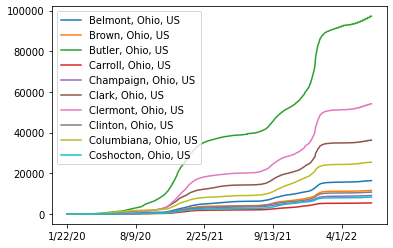

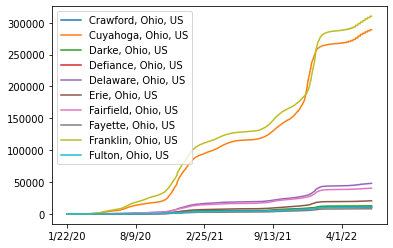

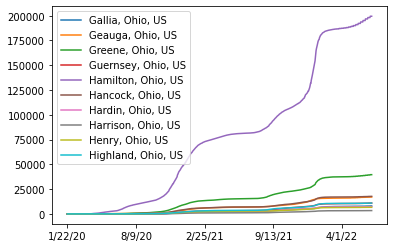

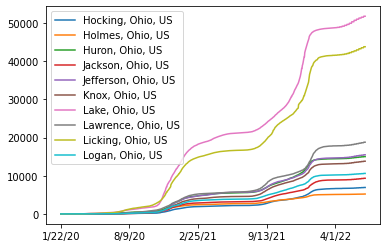

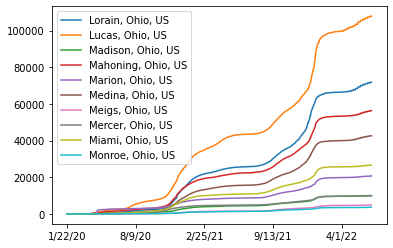

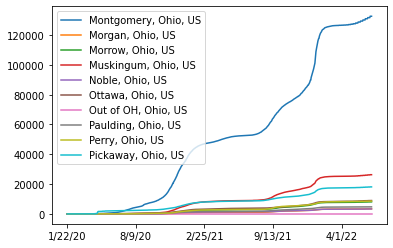

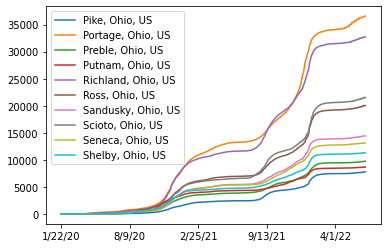

In [129]:
step = 10
for i in range(2000, 2200, step):
#for i in range(0, 3340, step):
  UScases = df1.iloc[ i : (i+step), 11:].transpose()
  UScases.plot()

In [30]:
df1.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22
"Teton, Wyoming, US",84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,10554,10554,10554,10699,10699,10699,10699,10699,10699,10699
"Uinta, Wyoming, US",84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,5753,5753,5753,5784,5784,5784,5784,5784,5784,5784
"Unassigned, Wyoming, US",84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
"Washakie, Wyoming, US",84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,2471,2471,2471,2490,2490,2490,2490,2490,2490,2490
"Weston, Wyoming, US",84056045,US,USA,840,56045.0,Weston,Wyoming,US,43.839612,-104.567488,...,1632,1632,1632,1641,1641,1641,1641,1641,1641,1641


## Note. It turns out that there are unassigned cases in some states, such as Wyoming. Thse unassigned cases become zero when they are settled. 

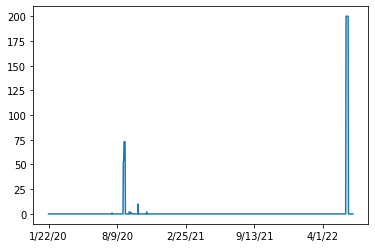

In [31]:
df1.loc['Unassigned, Wyoming, US', ][11:].plot()

In [32]:
df1.loc[ df1.index.str.contains('Unassigned'), ].shape

(52, 899)

In [33]:

df1.loc[ df1.index.str.contains('Unassigned'), ]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22
"Unassigned, Alabama, US",84090001,US,USA,840,90001.0,Unassigned,Alabama,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
"Unassigned, Alaska, US",84090002,US,USA,840,90002.0,Unassigned,Alaska,US,0.0,0.0,...,1043,1043,1043,1043,1109,1109,1109,1109,1109,1109
"Unassigned, Arizona, US",84090004,US,USA,840,90004.0,Unassigned,Arizona,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
"Unassigned, Arkansas, US",84090005,US,USA,840,90005.0,Unassigned,Arkansas,US,0.0,0.0,...,27569,27595,27601,27619,27654,27681,27714,27743,27775,27796
"Unassigned, California, US",84090006,US,USA,840,90006.0,Unassigned,California,US,0.0,0.0,...,3789,3789,3789,4750,4750,4750,2938,2938,2938,2938
"Unassigned, Colorado, US",84090008,US,USA,840,90008.0,Unassigned,Colorado,US,0.0,0.0,...,134,134,134,134,134,135,135,135,135,135
"Unassigned, Connecticut, US",84090009,US,USA,840,90009.0,Unassigned,Connecticut,US,0.0,0.0,...,2598,2598,2607,2617,3344,3284,2616,2616,2616,2616
"Unassigned, Delaware, US",84090010,US,USA,840,90010.0,Unassigned,Delaware,US,0.0,0.0,...,967,967,972,972,973,977,979,979,979,981
"Unassigned, District of Columbia, US",84090011,US,USA,840,90011.0,Unassigned,District of Columbia,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
"Unassigned, Florida, US",84090012,US,USA,840,90012.0,Unassigned,Florida,US,0.0,0.0,...,2964,2964,2964,2964,8920,21414,33256,44348,44348,60866


In [34]:
# df1.loc[df1.index.str.contains('Unassigned'), ].plot() #No, this is not working properly

In [35]:
# df1.loc[df1.index.str.contains("Unsassigned"),11:].plot() #error 

In [36]:
# df1.loc[df1.index.str.contains("Unassigned")][11:].plot() #wrong plot

In [37]:
#df1.loc[df1.index.str.contains('Unassigned'), :][:,11:]

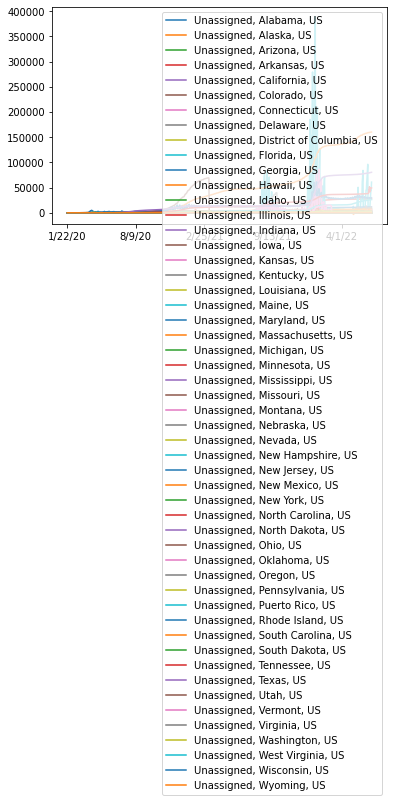

In [38]:
unassigned_df = df1.loc[df1.index.str.contains('Unassigned')]
unassigned_df.iloc[ :, 11:].shape
unassigned_df.iloc[ :, 11:].transpose().plot()

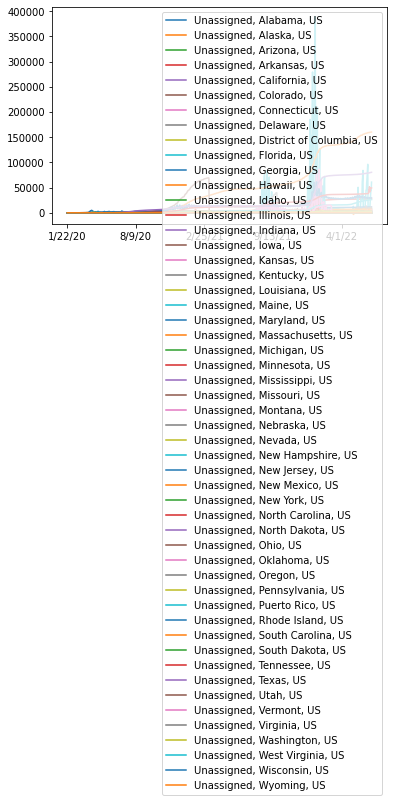

In [39]:
df1.loc[df1.index.str.contains('Unassigned')].iloc[:, 11:].transpose().plot() # Well done, a single line solution! 

## How about the cases at the Hamilton county, TN? 

In [132]:
# Can we examine cumualted cases at the Hamilton County, TN? 


df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US']

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22
"Hamilton, Tennessee, US",84047065,US,USA,840,47065.0,Hamilton,Tennessee,US,35.176702,-85.166522,...,103460,102866,102866,102866,103460,103460,103460,103460,103460,103460


In [41]:
dfHamilton = df1[df1.Combined_Key == "Hamilton, Tennessee, US"]
dfHamilton

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22
"Hamilton, Tennessee, US",84047065,US,USA,840,47065.0,Hamilton,Tennessee,US,35.176702,-85.166522,...,103460,102866,102866,102866,103460,103460,103460,103460,103460,103460


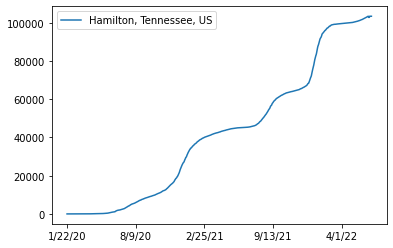

In [133]:
df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US'].iloc[:, 11:].transpose().plot()

# Part 3. Daily cases at Hamilton County
## Examine the daily confirmed cases in Hamilton County, TN

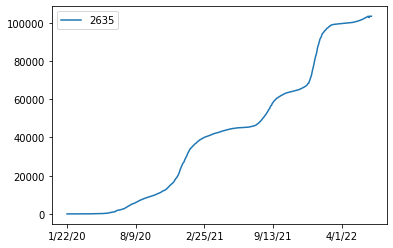

In [186]:
df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US'].iloc[:, 11:].transpose().plot()

In [187]:
df_county = df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US'].iloc[:, 11:]

type(df_county)
df_county.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22
2635,0,0,0,0,0,0,0,0,0,0,...,103460,102866,102866,102866,103460,103460,103460,103460,103460,103460


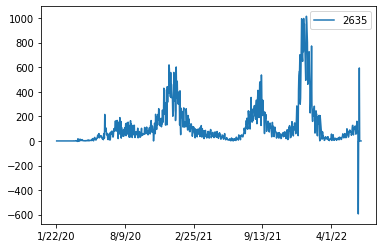

In [188]:
df_county.transpose().diff(axis=0).plot()

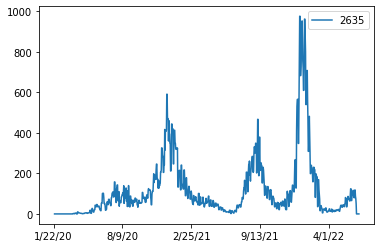

In [189]:
df_county.transpose().diff(axis=0).rolling(window=3).median().plot()

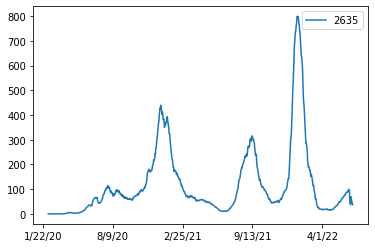

In [190]:
df_county.transpose().diff(axis=0).rolling(window=15).mean().plot()

#Part 4. Overlay Google Mobility estimate with daily COVID-19 cases. 

https://www.google.com/covid19/mobility/

## Use magjic commands to download data

In [48]:
! wget https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip 

--2022-06-28 13:28:37--  https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip
Resolving www.gstatic.com (www.gstatic.com)... 74.125.204.94, 2404:6800:4008:c07::5e
Connecting to www.gstatic.com (www.gstatic.com)|74.125.204.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87191142 (83M) [application/zip]
Saving to: ‘Region_Mobility_Report_CSVs.zip’

Region_Mobility_Rep 100%[===================>]  83.15M  41.9MB/s    in 2.0s    

2022-06-28 13:28:39 (41.9 MB/s) - ‘Region_Mobility_Report_CSVs.zip’ saved [87191142/87191142]



In [49]:
! unzip /content/Region_Mobility_Report_CSVs.zip

Archive:  /content/Region_Mobility_Report_CSVs.zip
  inflating: 2020_AE_Region_Mobility_Report.csv  
  inflating: 2020_AF_Region_Mobility_Report.csv  
  inflating: 2020_AG_Region_Mobility_Report.csv  
  inflating: 2020_AO_Region_Mobility_Report.csv  
  inflating: 2020_AR_Region_Mobility_Report.csv  
  inflating: 2020_AT_Region_Mobility_Report.csv  
  inflating: 2020_AU_Region_Mobility_Report.csv  
  inflating: 2020_AW_Region_Mobility_Report.csv  
  inflating: 2020_BA_Region_Mobility_Report.csv  
  inflating: 2020_BB_Region_Mobility_Report.csv  
  inflating: 2020_BD_Region_Mobility_Report.csv  
  inflating: 2020_BE_Region_Mobility_Report.csv  
  inflating: 2020_BF_Region_Mobility_Report.csv  
  inflating: 2020_BG_Region_Mobility_Report.csv  
  inflating: 2020_BH_Region_Mobility_Report.csv  
  inflating: 2020_BJ_Region_Mobility_Report.csv  
  inflating: 2020_BO_Region_Mobility_Report.csv  
  inflating: 2020_BR_Region_Mobility_Report.csv  
  inflating: 2020_BS_Region_Mobility_Report.csv  

In [141]:
! ls *US*csv

2020_US_Region_Mobility_Report.csv  2022_US_Region_Mobility_Report.csv
2021_US_Region_Mobility_Report.csv


## Read csv into pandas dataframe, and merge them

In [142]:
df_US20 = pd.read_csv( "2020_US_Region_Mobility_Report.csv")
df_US21 = pd.read_csv( "2021_US_Region_Mobility_Report.csv")
df_US22 = pd.read_csv( "2022_US_Region_Mobility_Report.csv")

In [172]:
df_US = pd.concat( [df_US20, df_US21, df_US22] )
df_US.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0


In [144]:
df_US.tail()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
454971,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2022-06-20,NaN,NaN,NaN,NaN,-38.0,NaN
454972,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2022-06-21,NaN,NaN,NaN,NaN,-32.0,NaN
454973,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2022-06-22,NaN,NaN,NaN,NaN,-40.0,NaN
454974,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2022-06-23,NaN,NaN,NaN,NaN,-34.0,NaN
454975,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2022-06-24,NaN,NaN,NaN,NaN,-35.0,NaN


## convert date into objects

In [145]:
df_US.index = pd.to_datetime(df_US.date)
df_US.index

DatetimeIndex(['2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24',
               ...
               '2022-06-13', '2022-06-14', '2022-06-15', '2022-06-16',
               '2022-06-17', '2022-06-20', '2022-06-21', '2022-06-22',
               '2022-06-23', '2022-06-24'],
              dtype='datetime64[ns]', name='date', length=2219001, freq=None)

## Pick a speciric County of a state

### Example of Hamilton TN moblility

In [162]:
#df_US.loc[ df_US.sub_region_1=='Tennessee'  ]

df_county_GM = df_US.loc[ ( df_US.sub_region_1=='Texas' ) & (df_US.sub_region_2=='Harris County') ]
df_county_GM.tail()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,,,,,,,,,,
2022-06-20,US,United States,Texas,Harris County,NaN,NaN,48201.0,ChIJ9TB__YrMQIYR2tK7sndSry4,2022-06-20,-14.0,-6.0,-20.0,-24.0,-38.0,8.0
2022-06-21,US,United States,Texas,Harris County,NaN,NaN,48201.0,ChIJ9TB__YrMQIYR2tK7sndSry4,2022-06-21,-13.0,-5.0,-14.0,-20.0,-32.0,7.0
2022-06-22,US,United States,Texas,Harris County,NaN,NaN,48201.0,ChIJ9TB__YrMQIYR2tK7sndSry4,2022-06-22,-13.0,-2.0,-5.0,-17.0,-31.0,6.0
2022-06-23,US,United States,Texas,Harris County,NaN,NaN,48201.0,ChIJ9TB__YrMQIYR2tK7sndSry4,2022-06-23,-14.0,-5.0,-6.0,-20.0,-32.0,6.0
2022-06-24,US,United States,Texas,Harris County,NaN,NaN,48201.0,ChIJ9TB__YrMQIYR2tK7sndSry4,2022-06-24,-16.0,-5.0,-13.0,-19.0,-33.0,7.0


## Daily COVID at this specific county

In [193]:
df_county_COVID = df1.loc[df1['Combined_Key'] == 'Harris, Texas, US'].iloc[:, 11:].transpose().diff(axis=0).rolling(window=7).mean()
#df_county_COVID = df1.loc[df1['Combined_Key'] == 'Harris, Texas, US'].iloc[:, 11:].transpose().diff(axis=0)

type(df_county_COVID)
df_county_COVID.tail()

,2800
6/23/22,1636.142857
6/24/22,1766.857143
6/25/22,1853.428571
6/26/22,2053.714286
6/27/22,2157.000000


In [194]:
df_county_COVID.index = pd.to_datetime(df_county_COVID.index)
#df_county_COVID.rename(columns={0:"daily_cases"}, inplace=True)
df_county_COVID.columns=["daily_cases"]
df_county_COVID.tail()

,daily_cases
2022-06-23,1636.142857
2022-06-24,1766.857143
2022-06-25,1853.428571
2022-06-26,2053.714286
2022-06-27,2157.000000


### Merge mobiligy with COVID data for Hamilton, TN

In [195]:
df_county = pd.merge(df_county_COVID, df_county_GM, left_index=True, right_index=True)
df_county.tail()

,daily_cases,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2022-06-20,1186.571429,US,United States,Texas,Harris County,NaN,NaN,48201.0,ChIJ9TB__YrMQIYR2tK7sndSry4,2022-06-20,-14.0,-6.0,-20.0,-24.0,-38.0,8.0
2022-06-21,1497.857143,US,United States,Texas,Harris County,NaN,NaN,48201.0,ChIJ9TB__YrMQIYR2tK7sndSry4,2022-06-21,-13.0,-5.0,-14.0,-20.0,-32.0,7.0
2022-06-22,1555.285714,US,United States,Texas,Harris County,NaN,NaN,48201.0,ChIJ9TB__YrMQIYR2tK7sndSry4,2022-06-22,-13.0,-2.0,-5.0,-17.0,-31.0,6.0
2022-06-23,1636.142857,US,United States,Texas,Harris County,NaN,NaN,48201.0,ChIJ9TB__YrMQIYR2tK7sndSry4,2022-06-23,-14.0,-5.0,-6.0,-20.0,-32.0,6.0
2022-06-24,1766.857143,US,United States,Texas,Harris County,NaN,NaN,48201.0,ChIJ9TB__YrMQIYR2tK7sndSry4,2022-06-24,-16.0,-5.0,-13.0,-19.0,-33.0,7.0


## Plot

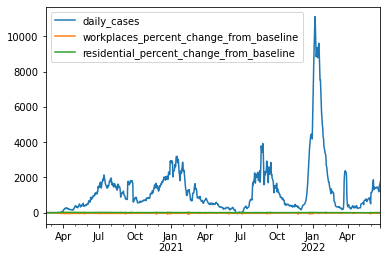

In [196]:
df_county[['daily_cases', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1cdec32290>,
      dtype=object)

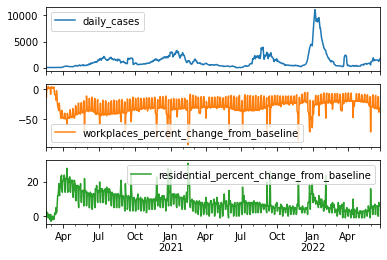

In [197]:
df_county[['daily_cases', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']].plot(subplots=True)

### Plot with normalized data and moving windows

In [ ]:
df_county2 = df_county[['daily_cases', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']]

df_county2 = ( df_county2 - df_county2.mean() ) / df_county2.std() 

df_county2.loc['2020-02-01':'2022-06-01', ].plot()

 Try to remove the weekly fluctuation by 15-day moving window

In [ ]:
df_county2.loc['2020-10-01':'2022-07-01', ].rolling(window=20).median().plot()

# Part 5. Examine the cases by States.

In [63]:

df1.loc[ :, 'Province_State']

Autauga, Alabama, US       Alabama
Baldwin, Alabama, US       Alabama
Barbour, Alabama, US       Alabama
Bibb, Alabama, US          Alabama
Blount, Alabama, US        Alabama
                            ...   
Teton, Wyoming, US         Wyoming
Uinta, Wyoming, US         Wyoming
Unassigned, Wyoming, US    Wyoming
Washakie, Wyoming, US      Wyoming
Weston, Wyoming, US        Wyoming
Name: Province_State, Length: 3342, dtype: object

In [64]:
groupby_state = df1.iloc[:,11:].groupby(df1['Province_State'])
type( groupby_state )

pandas.core.groupby.generic.DataFrameGroupBy

In [65]:
df_by_state = groupby_state.sum()
type( df_by_state )

pandas.core.frame.DataFrame

In [66]:
df_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,1334981,1334981,1338177,1340110,1342150,1344233,1346268,1346268,1346268,1350735
Alaska,0,0,0,0,0,0,0,0,0,0,...,266731,266731,266731,266731,269311,269311,269311,269311,269311,269311
American Samoa,0,0,0,0,0,0,0,0,0,0,...,6342,6342,6342,6342,6342,6342,6414,6414,6414,6414
Arizona,0,0,0,0,1,1,1,1,1,1,...,2093680,2093680,2093680,2093680,2109053,2109053,2109053,2109053,2109053,2109053
Arkansas,0,0,0,0,0,0,0,0,0,0,...,854717,855292,855543,856307,857119,858553,859615,860503,861010,861403


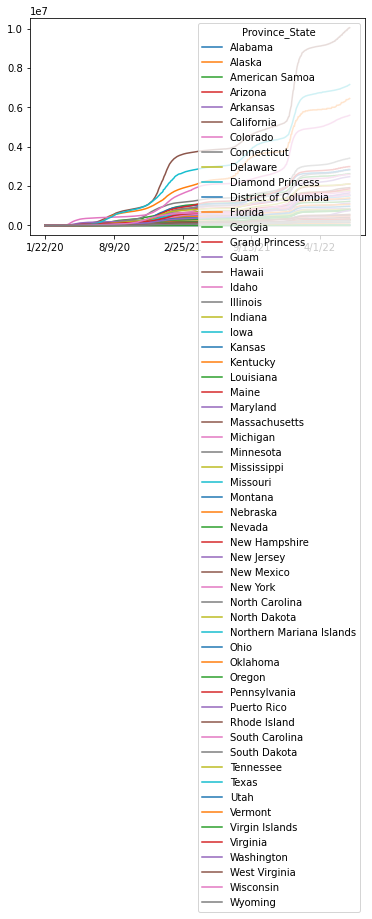

In [67]:
df_by_state.transpose().plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ce2ade910>,
      dtype=object)

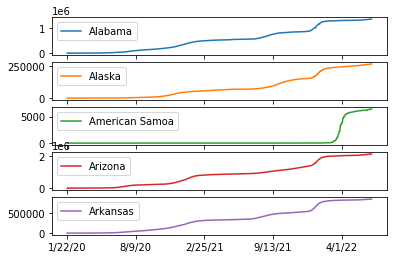

In [68]:
df_by_state.transpose().iloc[:,0:5].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ce2dd2fd0>],
      dtype=object)

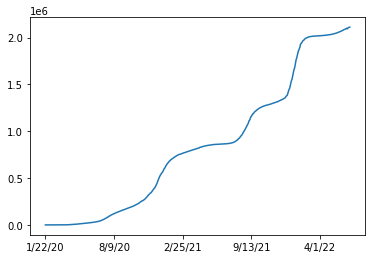

In [69]:
df_by_state.transpose().loc[:,"Tennessee"].plot(subplots=True)

In [70]:
df_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,1334981,1334981,1338177,1340110,1342150,1344233,1346268,1346268,1346268,1350735
Alaska,0,0,0,0,0,0,0,0,0,0,...,266731,266731,266731,266731,269311,269311,269311,269311,269311,269311
American Samoa,0,0,0,0,0,0,0,0,0,0,...,6342,6342,6342,6342,6342,6342,6414,6414,6414,6414
Arizona,0,0,0,0,1,1,1,1,1,1,...,2093680,2093680,2093680,2093680,2109053,2109053,2109053,2109053,2109053,2109053
Arkansas,0,0,0,0,0,0,0,0,0,0,...,854717,855292,855543,856307,857119,858553,859615,860503,861010,861403


In [71]:
# df_by_state.loc['Tennessee'][11:].transpose().plot() #This is bit problematic on the columns

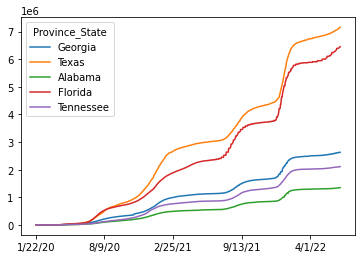

In [72]:
df_by_state.loc[['Georgia', 'Texas', 'Alabama', 'Florida', 'Tennessee']].transpose().plot() #Here, Texas and Tennessee are row-index

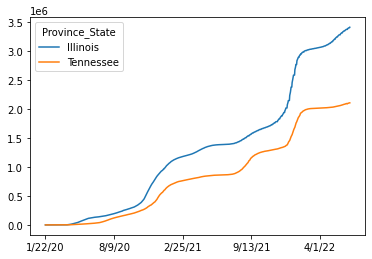

In [73]:
df_by_state.transpose()[['Illinois', 'Tennessee']].plot() #Here, Texas ans Tennessee are columns

## How to examine the new cases daily? 

### diff() on a test dataframe

In [74]:
dataset = [(2, 4, 6, 8),
           (10, 12, 14, 18),
           (20, 22, 24, 26),
           (28, 30, 32, 34)];

df_test = pd.DataFrame(dataset, columns = ("A", "B", "C", "D" ));


In [75]:
df_test.diff(axis=0) #by row

,A,B,C,D
0,NaN,NaN,NaN,NaN
1,8.0,8.0,8.0,10.0
2,10.0,10.0,10.0,8.0
3,8.0,8.0,8.0,8.0


In [76]:
df_test.diff(axis=1) #by column

,A,B,C,D
0,NaN,2,2,2
1,NaN,2,2,4
2,NaN,2,2,2
3,NaN,2,2,2


### diff() on US covid19 data set
 JHU cases are by row, and we need to calculate difference between columns

In [77]:
df_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,1334981,1334981,1338177,1340110,1342150,1344233,1346268,1346268,1346268,1350735
Alaska,0,0,0,0,0,0,0,0,0,0,...,266731,266731,266731,266731,269311,269311,269311,269311,269311,269311
American Samoa,0,0,0,0,0,0,0,0,0,0,...,6342,6342,6342,6342,6342,6342,6414,6414,6414,6414
Arizona,0,0,0,0,1,1,1,1,1,1,...,2093680,2093680,2093680,2093680,2109053,2109053,2109053,2109053,2109053,2109053
Arkansas,0,0,0,0,0,0,0,0,0,0,...,854717,855292,855543,856307,857119,858553,859615,860503,861010,861403


In [78]:
df_dailycases_by_state =  df_by_state.diff(axis=1) #1 by columns
df_dailycases_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,NaN,0,0,0,0,0,0,0,0,0,...,0,0,3196,1933,2040,2083,2035,0,0,4467
Alaska,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2580,0,0,0,0,0
American Samoa,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,72,0,0,0
Arizona,NaN,0,0,0,1,0,0,0,0,0,...,0,0,0,0,15373,0,0,0,0,0
Arkansas,NaN,0,0,0,0,0,0,0,0,0,...,708,575,251,764,812,1434,1062,888,507,393


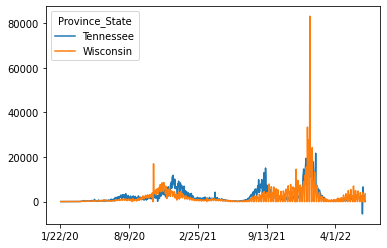

In [79]:
df_dailycases_by_state.transpose()[['Tennessee', 'Wisconsin']].plot()

In [80]:
df_dailycases_by_state.loc[['Tennessee', 'Texas']].iloc[:, 2:].rolling(window=3).mean()

#.rolling(window=3).mean()

,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,...,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22
Province_State,,,,,,,,,,,,,,,,,,,,,
Tennessee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska']].rolling(window=3, center=False).mean()

Province_State,Tennessee,Alaska
1/22/20,NaN,NaN
1/23/20,NaN,NaN
1/24/20,NaN,NaN
1/25/20,0.000000,0.0
1/26/20,0.000000,0.0
...,...,...
6/23/22,3823.666667,860.0
6/24/22,2513.000000,860.0
6/25/22,2674.333333,0.0
6/26/22,1766.333333,0.0


In [82]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska']].head()

Province_State,Tennessee,Alaska
1/22/20,NaN,NaN
1/23/20,0.0,0.0
1/24/20,0.0,0.0
1/25/20,0.0,0.0
1/26/20,0.0,0.0


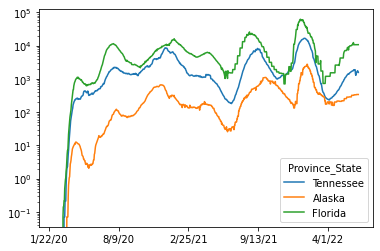

In [83]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska', 'Florida']].rolling(window=14).mean().plot(logy=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ce2e082d0>,
      dtype=object)

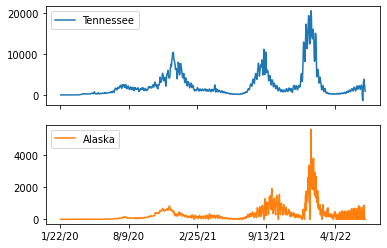

In [84]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska']].rolling(window=3).mean().plot(subplots=True)

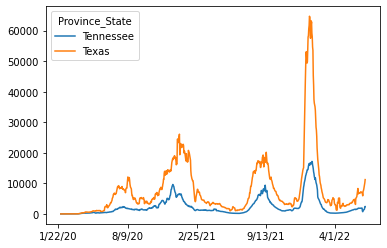

In [85]:
df_dailycases_by_state.transpose()[['Tennessee', 'Texas']].rolling(window=7).mean().plot()

In [86]:
df_dailycases_by_state.transpose()[['Tennessee', 'Texas']].head()

Province_State,Tennessee,Texas
1/22/20,NaN,NaN
1/23/20,0.0,0.0
1/24/20,0.0,0.0
1/25/20,0.0,0.0
1/26/20,0.0,0.0


# Part 6. Explore COVID-19 confirmed death data

In [87]:
fullpath_deathfile = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"

df_death = pd.read_csv(fullpath1, error_bad_lines=False)
df_death.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,16211,16211,16279,16313,16330,16360,16400,16400,16400,16468
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,57726,57726,57887,58009,58169,58293,58372,58372,58372,58595
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,5782,5782,5795,5813,5818,5825,5832,5832,5832,5857
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,6611,6611,6621,6630,6648,6654,6663,6663,6663,6679
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,15207,15207,15222,15246,15249,15272,15283,15283,15283,15324


In [88]:
df_death.columns[8:15]

Index(['Lat', 'Long_', 'Combined_Key', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20'],
      dtype='object')

In [89]:
df_death.set_index('Combined_Key', inplace=True)
df_death.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22
Combined_Key,,,,,,,,,,,,,,,,,,,,,
"Autauga, Alabama, US",84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,16211,16211,16279,16313,16330,16360,16400,16400,16400,16468
"Baldwin, Alabama, US",84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,57726,57726,57887,58009,58169,58293,58372,58372,58372,58595
"Barbour, Alabama, US",84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,5782,5782,5795,5813,5818,5825,5832,5832,5832,5857
"Bibb, Alabama, US",84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,6611,6611,6621,6630,6648,6654,6663,6663,6663,6679
"Blount, Alabama, US",84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,15207,15207,15222,15246,15249,15272,15283,15283,15283,15324


In [90]:
dfD_daily =  df_death.iloc[:,11:].diff(axis=1) #1 by columns
dfD_daily.head()

,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,...,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22
Combined_Key,,,,,,,,,,,,,,,,,,,,,
"Autauga, Alabama, US",NaN,0,0,0,0,0,0,0,0,0,...,0,0,68,34,17,30,40,0,0,68
"Baldwin, Alabama, US",NaN,0,0,0,0,0,0,0,0,0,...,0,0,161,122,160,124,79,0,0,223
"Barbour, Alabama, US",NaN,0,0,0,0,0,0,0,0,0,...,0,0,13,18,5,7,7,0,0,25
"Bibb, Alabama, US",NaN,0,0,0,0,0,0,0,0,0,...,0,0,10,9,18,6,9,0,0,16
"Blount, Alabama, US",NaN,0,0,0,0,0,0,0,0,0,...,0,0,15,24,3,23,11,0,0,41


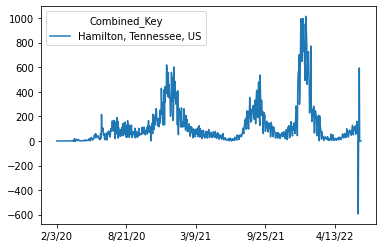

In [91]:
dfD_daily.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US'].iloc[:, 11:].transpose().plot()

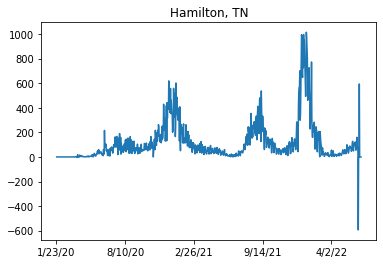

In [92]:
dfD_daily.loc['Hamilton, Tennessee, US', ].transpose().plot(title="Hamilton, TN")

#Part 7 Explore Global Data set

In [93]:

df2 = pd.read_csv(fullpath2, error_bad_lines=False)
df2.columns

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/18/22', '6/19/22', '6/20/22', '6/21/22', '6/22/22', '6/23/22',
       '6/24/22', '6/25/22', '6/26/22', '6/27/22'],
      dtype='object', length=892)

In [94]:
df2['Country/Region']
list(df2['Country/Region'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Biss

In [95]:
# Countries affected
countries = df2['Country/Region'].unique().tolist()
print("\nTotal countries affected by virus: ",len(countries))
print(countries)


Total countries affected by virus:  199
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy Se

In [96]:
df2by_country = df2.iloc[:, 5:].groupby(df2['Country/Region']).sum().transpose()

In [97]:
df2by_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0
1/27/20,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,2,0,0,0,0,0


In [98]:
df2by_country.index = pd.to_datetime(df2by_country.index)

In [99]:
### Check if the dataframe contains NaN values
df2by_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,2,0,0,0,0,0


In [100]:
  df2by_country.columns[ df2by_country.columns.str.contains('US') ]

Index(['US'], dtype='object', name='Country/Region')

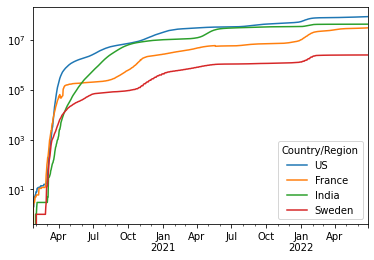

In [101]:
  df2by_country[['US', 'France', 'India', 'Sweden']].plot(logy=True)


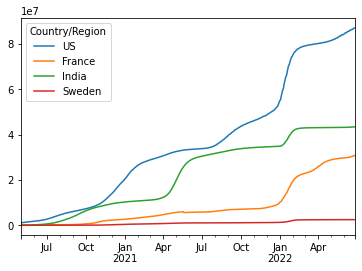

In [102]:
  df2by_country[['US', 'France', 'India', 'Sweden']]['2020-05-01':].plot(logy=False)

# Alternative approach to load data from GitHub

Go to GitHub, select the csv file,  select "view as raw",  and copy the URL. 

In [103]:
import pandas as pd

url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"

df = pd.read_csv(url)

In [104]:
df.head

<bound method NDFrame.head of            UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0     84001001   US  USA    840   1001.0     Autauga        Alabama   
1     84001003   US  USA    840   1003.0     Baldwin        Alabama   
2     84001005   US  USA    840   1005.0     Barbour        Alabama   
3     84001007   US  USA    840   1007.0        Bibb        Alabama   
4     84001009   US  USA    840   1009.0      Blount        Alabama   
...        ...  ...  ...    ...      ...         ...            ...   
3337  84056039   US  USA    840  56039.0       Teton        Wyoming   
3338  84056041   US  USA    840  56041.0       Uinta        Wyoming   
3339  84090056   US  USA    840  90056.0  Unassigned        Wyoming   
3340  84056043   US  USA    840  56043.0    Washakie        Wyoming   
3341  84056045   US  USA    840  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_  ... 6/18/22  6/19/22  6/20/22  \
0                US  32.539527  -86.6440

In [105]:
? pd.read_csv()

In [106]:
df2 = pd.read_csv(url, skiprows=5)
df2.head

<bound method NDFrame.head of       84001009  US  USA  840   1009.0      Blount  Alabama US.1  33.98210918  \
0     84001011  US  USA  840   1011.0     Bullock  Alabama   US    32.100305   
1     84001013  US  USA  840   1013.0      Butler  Alabama   US    31.753001   
2     84001015  US  USA  840   1015.0     Calhoun  Alabama   US    33.774837   
3     84001017  US  USA  840   1017.0    Chambers  Alabama   US    32.913601   
4     84001019  US  USA  840   1019.0    Cherokee  Alabama   US    34.178060   
...        ...  ..  ...  ...      ...         ...      ...  ...          ...   
3332  84056039  US  USA  840  56039.0       Teton  Wyoming   US    43.935225   
3333  84056041  US  USA  840  56041.0       Uinta  Wyoming   US    41.287818   
3334  84090056  US  USA  840  90056.0  Unassigned  Wyoming   US     0.000000   
3335  84056043  US  USA  840  56043.0    Washakie  Wyoming   US    43.904516   
3336  84056045  US  USA  840  56045.0      Weston  Wyoming   US    43.839612   

      -86